Link do youtube aqui

# 1

Tendo como ponto de partida o exercício do Trabalho 1, as bibliotecas necessárias serão importadas, mas com apenas um algoritmo de classificação, no caso, foi selecionado o Regressão Logística. Para utilizar o TargetEncoder foi necessário a instalação do pacote category_encoders e fazer a importação desta biblioteca (TargetEncoder) e o OrdinalEncoder também foi utilizado.

In [106]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

Fazer a carga dos datasets a partir dos arquivos credtrain.txt e credtest.txt, passando o nome das colunas. Verificar se o dataset foi carregado corretamente e analisar o conteúdo do dataset

In [107]:
# Define o nomes das colunas
nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

# Carrega o dataset de treinamento
dsTrain = pd.read_csv('../data/credtrain.txt', names=nomes_colunas, sep='\t', header=0)

# Carrega o dataset de teste
dsTeste = pd.read_csv('../data/credtest.txt', names=nomes_colunas, sep='\t', header=0 )


In [108]:
dsTrain.head()
dsTeste.head()
dsTrain.info()
dsTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ESCT     1499 non-null   int64
 1   NDEP     1499 non-null   int64
 2   RENDA    1499 non-null   int64
 3   TIPOR    1499 non-null   int64
 4   VBEM     1499 non-null   int64
 5   NPARC    1499 non-null   int64
 6   VPARC    1499 non-null   int64
 7   TEL      1499 non-null   int64
 8   IDADE    1499 non-null   int64
 9   RESMS    1499 non-null   int64
 10  ENTRADA  1499 non-null   int64
 11  CLASSE   1499 non-null   int64
dtypes: int64(12)
memory usage: 140.7 KB


,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.511674,0.126751,984.928619,0.445630,562.197465,8.392262,102.280854,0.134089,41.221481,31.517678,32.276851,0.476318
std,0.660009,0.573047,905.691299,0.497201,265.701366,3.610302,62.994960,0.340862,13.200024,52.677954,94.335403,0.499606
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,468.500000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.000000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.000000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


No trabalho anterior foi utilizado o One-hot-encoding para codificar os atributos categóricos. Para este trabalho será utilizado o TargetEncoder para o campo com Estado Civil (ESCT).

In [109]:
valoresESCT = dsTrain['ESCT'].unique()

import category_encoders 
encoder = TargetEncoder(cols=['ESCT'])

#category_encoders.
# Ajustando o encoder aos dados Estado Civil (dsTrain)
encoder.fit(dsTrain['ESCT'], dsTrain['CLASSE'])
dsTrain['ESCT_Encoded'] = encoder.transform(dsTrain['ESCT'], dsTrain['CLASSE'])

# Ajustando o encoder aos dados Estado Civil (dsTeste)
encoder.fit(dsTeste['ESCT'], dsTeste['CLASSE'])
dsTeste['ESCT_Encoded'] = encoder.transform(dsTeste['ESCT'], dsTeste['CLASSE'])

# Remover as colunas alteradas
dsTrain = dsTrain.drop('ESCT', axis=1)
dsTeste = dsTeste.drop('ESCT', axis=1)

dsTrain.head()
dsTrain.describe()

c:\Users\helio\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\helio\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\helio\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: Futur

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_Encoded
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.126751,984.928619,0.445630,562.197465,8.392262,102.280854,0.134089,41.221481,31.517678,32.276851,0.476318,0.476555
std,0.573047,905.691299,0.497201,265.701366,3.610302,62.994960,0.340862,13.200024,52.677954,94.335403,0.499606,0.080988
min,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.407674
25%,0.000000,468.500000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000,0.407674
50%,0.000000,650.000000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000,0.407674
75%,0.000000,1200.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000,0.575000
max,7.000000,8000.000000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000,0.575000


Como os registros do dataset são numéricos, aplicaremos uma discritização do campo NDEP, número de dependentes, para quatro faixas, a saber: "sem dependentes", "com 1 dependente", "com 2 dependentes", "com mais de 2 dependentes". Após esta operação utilizaremos o OrdinalEncoder para aplicar o segundo método de codificação de atributos categóricos solicitado no exercício.

In [110]:
# Defina os limites dos bins
bins = [-1, 0, 1, 2, float('inf')]  # O último intervalo é para >2

# Defina as categorias correspondentes
categoria_ndep = ["sem dependente", "um dependente", "dois dependente", "mais de dois dependentes"]

# Use a função cut para criar os bins
dsTrain['NDEP_faixa'] = pd.cut(dsTrain['NDEP'], bins=bins, labels=categoria_ndep)
dsTeste['NDEP_faixa'] = pd.cut(dsTeste['NDEP'], bins=bins, labels=categoria_ndep)

# Utiliza a codificação de atributos categóricos OrdinalEncoder
order_ndep=OrdinalEncoder(categories=[categoria_ndep])

# Adiciona campo cut com numeraçao crescente (dsTrain)
order_ndep.fit(dsTrain['NDEP_faixa'].values.reshape(-1,1))
ndep_encoded = order_ndep.transform(dsTrain['NDEP_faixa'].values.reshape(-1,1))
dsTrain['NDEP_encoded'] = ndep_encoded

# Adiciona campo cut com numeraçao crescente (dsTeste)
order_ndep.fit(dsTeste['NDEP_faixa'].values.reshape(-1,1))
ndep_encoded = order_ndep.transform(dsTeste['NDEP_faixa'].values.reshape(-1,1))
dsTeste['NDEP_encoded'] = ndep_encoded

# Remover as colunas alteradas
dsTrain = dsTrain.drop('NDEP', axis=1)
dsTrain = dsTrain.drop('NDEP_faixa', axis=1)
dsTeste = dsTeste.drop('NDEP', axis=1)
dsTeste = dsTeste.drop('NDEP_faixa', axis=1)

#dsTrain.head(1000)
#dsTrain.describe()

O dataset é separado em features (X) e target (y) para o dataset de Treinamento (dsTrain) e de teste (dsTeste)

In [111]:
# Carregar os datasets em features (X) e target (y)
X_train = dsTrain.drop('CLASSE', axis=1)
y_train = dsTrain['CLASSE']

X_test = dsTeste.drop('CLASSE', axis=1)
y_test = dsTeste['CLASSE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing MixMax
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.transform(X_test)


Uma vez realizado o pré-processamento dos dados, o modelo será treinado com os algoritmo Regressão Logística. Verificando a acurácia de modelo. 

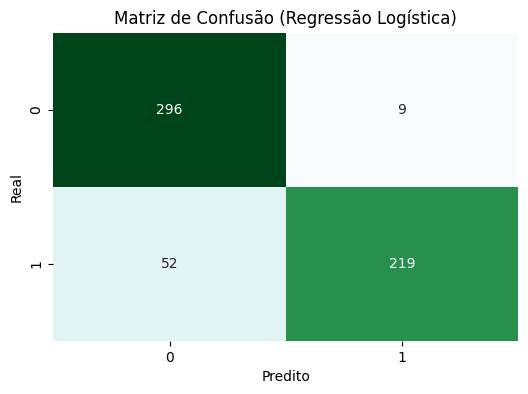

Acurácia do modelo: 0.8940972222222222


In [112]:
# Aplicando a Regressão Logística
modelLR = LogisticRegression(solver='lbfgs', random_state=0)
modelLR.fit(X_train, y_train)

# Fazer a predição da Regressão Logística
y_predict_LR = modelLR.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_LR)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_LR)

# Visualizar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuGn", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Regressão Logística)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')

Pelo trabalho anterior foi atingido uma acurácia de 0.890625, depois das modificações de outras técnicas de encoder, como TargetEncoder e OrrdinalEncoder, conseguimos uma acurácia ligeiramente superior, em 0.89409722..

# 2 (Antigo)

Importar as bibliotecas necessárias (para efeito didático algumas bibliotecas serão carregadas novamente, as mesmas já carregadas no inicio do notebook) e carregar os dados em arquivo texto para o dataset

In [12]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

Carregar os dados dos diamantes a partir do arquivo de texto. 

In [13]:
# Carregar o dataset a partir do arquivo texto
dataset = pd.read_csv('../data/diamonds.csv', header=0)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Os campos cut, color e clarity são objetos e devem ser convertidos em valores numéricos para processamento dos algoritmos. Estes campos obedecem uma ordem qualitativa, então foi utilizado o recurso Ordinal Encoder para fazer esta transformação. 

In [14]:
#dataset.cut.unique()
dataset.clarity.unique()

# Determina um vetor com valores crescentes dos atributos cut, color e clarity
order_cut = ['Fair','Good', 'Very Good', 'Premium', 'Ideal']
order_color = ['J','I','H','G','F','E','D']
order_clarity = ['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL']

# Adiciona campo cut com numeraçao crescente
order_encoder_cut=OrdinalEncoder(categories=[order_cut])
cut_encoded = order_encoder_cut.fit_transform(dataset[['cut']])
dataset['cut_encoded'] = cut_encoded

# Adiciona campo color com numeraçao crescente
order_encoder_color=OrdinalEncoder(categories=[order_color])
color_encoded = order_encoder_color.fit_transform(dataset[['color']])
dataset['color_encoded'] = color_encoded

# Adiciona campo clarity com numeraçao crescente
order_encoder_clarity=OrdinalEncoder(categories=[order_clarity])
clarity_encoded = order_encoder_clarity.fit_transform(dataset[['clarity']])
dataset['clarity_encoded'] = clarity_encoded

# Remover as colunas de objetos que foram transformados
dataset = dataset.drop('cut', axis=1)
dataset = dataset.drop('color', axis=1)
dataset = dataset.drop('clarity', axis=1)

# Remove o campo identidade do ínico
dataset = dataset.drop(dataset.columns[0], axis=1) 
dataset.head()
dataset.drop(dataset.columns[0], axis=1)

# Remover os registros onde a dimensão do diamante é zero
dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)


dataset.describe()

,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,2.904228,3.405972,5.051502
std,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,1.116579,1.701272,1.647005
min,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,2.000000
25%,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,4.000000
50%,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,5.000000
75%,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,4.000000,5.000000,6.000000
max,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,6.000000,9.000000


E fazer a separação em dois datasets: treinamento e teste obedecendo a relação de 20% em relação ao total de registros. Para isto, será usado a biblioteca train_test_split. 

In [15]:
# Define as features e o target do modelo (campo price) para predizer o valor
X= dataset.drop(["price"],axis =1)
y= dataset["price"]

# Separar em teste e treinamento na razão de 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing MixMax
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.transform(X_test)

Realizar o treinamento com cada um dos algoritmos de regressão listados: Regressão Linear, Lasso, Decison Tree Regressor, K Neighbors Regressor e Gradient Boosting Regressor. Como esses algoritmos de regressão compartilham as mesmas chamadas de fit, predict, r2_score e mean_squared_error, utilizando os hiperparâmetros padrões, será definida uma lista com as funções a serem executadas em bloco.

In [16]:
# Definir a lista dos algoritmos a serem utilizados
listaAlgoritmosReg = [LinearRegression, Lasso, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, GradientBoostingRegressor]

# Armazena o melhor algoritmo com base no valor do r2 (maior = melhor)
melhorR2 = 0
melhorMse = 0
melhorAlgoritmo = ""

for modeloAlgo in listaAlgoritmosReg:
    modeloSelecionado = modeloAlgo()
    modeloSelecionado.fit(X_train, y_train)
    y_pred_sel = modeloSelecionado.predict(X_test)

    mse = mean_squared_error(y_test, y_pred_sel)
    r2 = r2_score(y_test, y_pred_sel)

    if (r2 > melhorR2):
        melhorR2 = r2
        melhorMse= mse
        melhorAlgoritmo = modeloAlgo.__name__


    print(modeloAlgo.__name__)
    print("MSE = " ,mse)
    print('R2 = %.2f' % r2)
    print("--------------------------------------------------")

print("Melhor algoritmo = ", melhorAlgoritmo)
print("MSE = ", melhorMse)
print("R2 = ", melhorR2)

LinearRegression
MSE =  2646009.3088137344
R2 = 0.84
--------------------------------------------------
Lasso
MSE =  2623195.715663268
R2 = 0.84
--------------------------------------------------
DecisionTreeRegressor
MSE =  560276.6093853033
R2 = 0.97
--------------------------------------------------
RandomForestRegressor
MSE =  290199.6406943263
R2 = 0.98
--------------------------------------------------
KNeighborsRegressor
MSE =  511619.7383531157
R2 = 0.97
--------------------------------------------------
GradientBoostingRegressor
MSE =  380170.457519977
R2 = 0.98
--------------------------------------------------
Melhor algoritmo =  RandomForestRegressor
MSE =  290199.6406943263
R2 =  0.9820800442975219


# 2

Como primeiro passo, vamos para a importação das bibliotecas necessárias.

In [7]:
import numpy as np
import pandas as pd
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



Fazer a importação dos dados a partir dos arquivos no formato pickle: A602.pickle, A621.pickle, A627.pickle, A636.pickle, A652.pickle. Criando um dataset para cada arquivo. No target dos dataset foi feito a discretização para atender as 5 faixas de nível de chuva: NONE, WEAK, MODERATE, STRONG e EXTREME conforme solicitado no enunciado do exercício. Usando a função cut do Pandas.

In [12]:
arquivos_pickle = ['A602','A621','A627','A636','A652']

flag = True
for index, arquivo in enumerate(arquivos_pickle):
    caminho = '../data/atmoseer/'
    extensao = '.pickle'

    outfilename = caminho + arquivo + extensao
    print(outfilename)

    f = open(outfilename, 'rb')
    (X_train_0 , y_train_0 , X_val_0 , y_val_0 , X_test_0 , y_test_0 ) = pickle.load(f) 

    # Converter as matrizes para dataframes
    X_train = pd.DataFrame(X_train_0)
    y_train = pd.DataFrame(y_train_0)

    X_val = pd.DataFrame(X_val_0)
    y_val = pd.DataFrame(y_val_0)

    X_test = pd.DataFrame(X_test_0)
    y_test = pd.DataFrame(y_test_0)

    #dependentes = pd.Series([0, 1, 2, 3, 4, 5, 6])

    # Defina os limites dos bins
    bins = [-1, 0, 5, 25, 50, float('inf')]  

    # Defina as categorias correspondentes
    labels = ["NONE", "WEAK", "MODERATE", "STRONG", "EXTREME"]

    # Use a função cut para criar os bins
    y_train[0] = pd.cut(y_train[0], bins=bins, labels=labels)
    y_test[0] = pd.cut(y_test[0], bins=bins, labels=labels)
    
    # Conforme o index é criado um dataset para cada arquivo
    match index:
        case 0:
            C_X_train_A602 = X_train
            C_y_train_A602 = y_train
            C_X_test_A602 =  X_test
            C_y_test_A602 =  y_test
        case 1:
            C_X_train_A621 = X_train
            C_y_train_A621 = y_train
            C_X_test_A621 = X_test
            C_y_test_A621 = y_test
        case 2:
            C_X_train_A627 = X_train
            C_y_train_A627 = y_train
            C_X_test_A627 = X_test
            C_y_test_A627 = y_test
        case 3:
            C_X_train_A636 = X_train
            C_y_train_A636 = y_train
            C_X_test_A636 = X_test
            C_y_test_A636 = y_test
        case 4:
            C_X_train_A652 = X_train
            C_y_train_A652 = y_train
            C_X_test_A652 = X_test
            C_y_test_A652 = y_test


y_train.describe()


../data/atmoseer/A602.pickle
../data/atmoseer/A621.pickle
../data/atmoseer/A627.pickle
../data/atmoseer/A636.pickle
../data/atmoseer/A652.pickle


,0
count,10012
unique,4
top,NONE
freq,9258


Para simplificar a execução do algortimo GradientBoostingClassifier, foi criada uma função para ser chamada a cada dataset do pickle. Exibindo a matriz de confusão e indicadores do classification_report

In [37]:
def executarGBC(_X_train, _y_train, _X_test, _y_test, cabecalho):
    # Aplicando a Gradient Boosting Classifier
    modelGB = GradientBoostingClassifier()
    modelGB.fit(_X_train, _y_train)

    # Fazer a predição de Gradient Boosting Classifier
    y_predict_GB = modelGB.predict(_X_test)

    # Gerar a matriz de confusão
    conf_matrix = confusion_matrix(_y_test, y_predict_GB)

    # Calcular a acurácia
    accuracy = accuracy_score(_y_test, y_predict_GB)
    
    # Visualizar a Gradiente Boosting Classifier
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão - ' + cabecalho)
    plt.show()


    precision_relatorio =  round(accuracy_score(_y_test, y_predict_GB), 4)
    recall_relatorio = round(recall_score(_y_test, y_predict_GB, average="macro", zero_division=1), 4)
    F1_relatorio =  round(f1_score(_y_test, y_predict_GB, average="macro", zero_division=1), 4)
    metrics_relatorio = [precision_relatorio, recall_relatorio, F1_relatorio]

    relatorio = pd.DataFrame(list(metrics_relatorio))
    relatorio.index = ['Precision', 'Recall', 'F1_score']
    relatorio.columns = [cabecalho]
    print(relatorio)

    return accuracy


A partir da iteração dos arquivos pickles, é executado o algoritmo GradientBoostingClassifier e na sequencia a curva de aprendizagem correspondente.

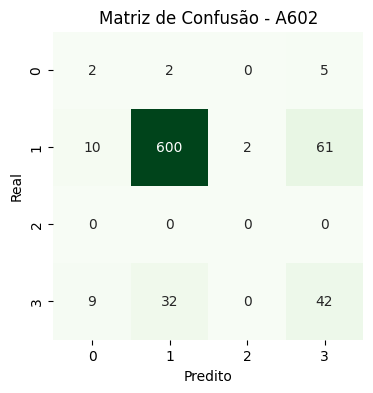

             A602
Precision  0.8418
Recall     0.6549
F1_score   0.3728
Acurácia no conjunto de validação: 0.84


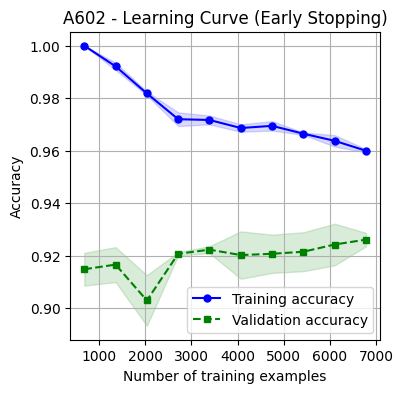

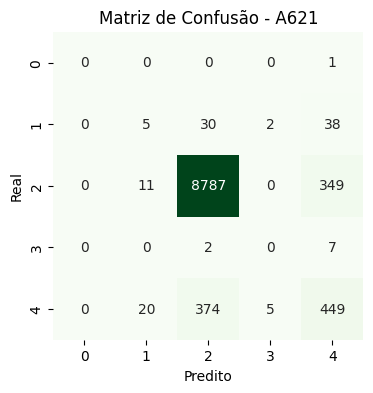

             A621
Precision  0.9168
Recall     0.3114
F1_score   0.3158
Acurácia no conjunto de validação: 0.92


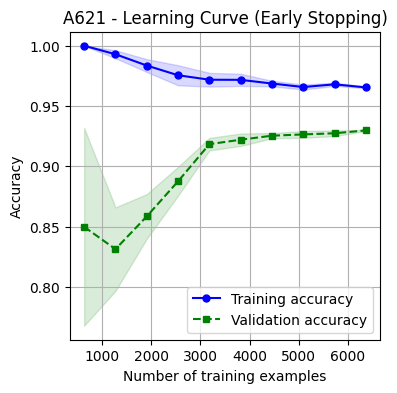

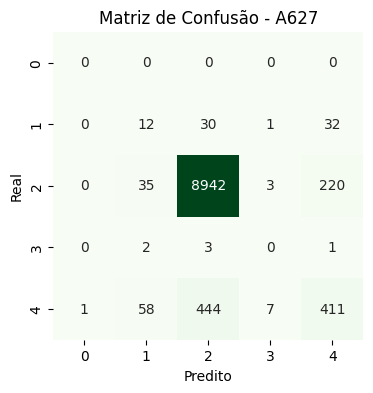

             A627
Precision  0.9180
Recall     0.5156
F1_score   0.3222
Acurácia no conjunto de validação: 0.92


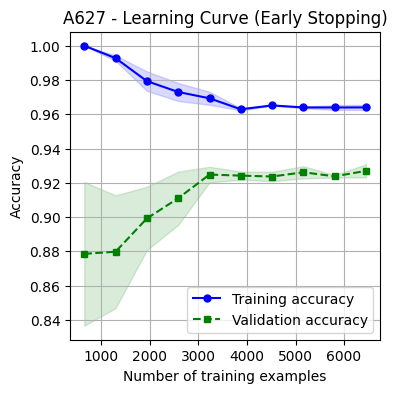

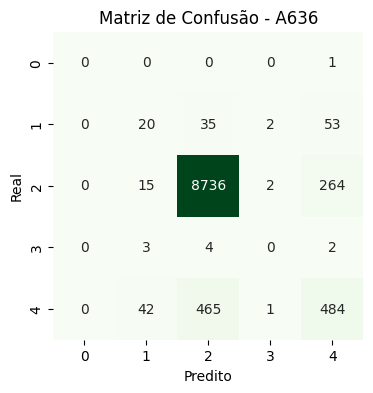

             A636
Precision  0.9122
Recall     0.3277
F1_score   0.3413
Acurácia no conjunto de validação: 0.91


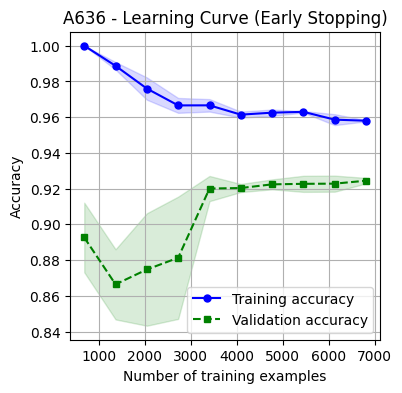

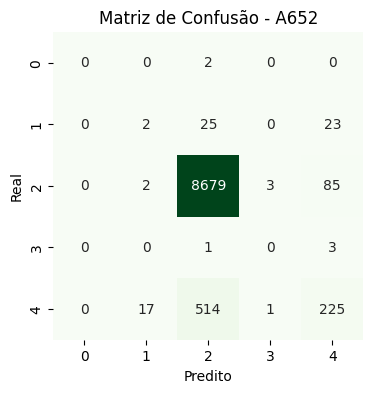

             A652
Precision  0.9295
Recall     0.2654
F1_score   0.2866
Acurácia no conjunto de validação: 0.93


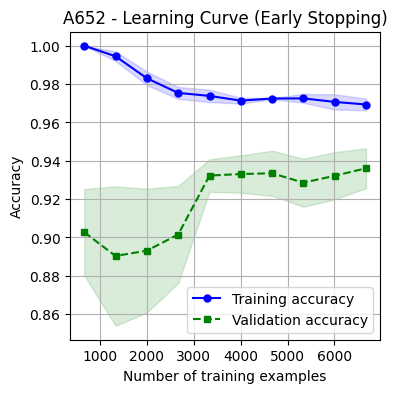

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier

warnings.filterwarnings("ignore")
model = GradientBoostingClassifier()

for index, arquivo in enumerate(arquivos_pickle):

    match index:
        case 0:
            accuracy = executarGBC(C_X_train_A602, C_y_train_A602, C_X_test_A602, C_y_test_A602, arquivo)
            print(f"Acurácia no conjunto de validação: {accuracy:.2f}")

            # Calcular curva de aprendizado
            train_sizes, train_scores, test_scores = learning_curve(
                model, C_X_train_A602, C_y_train_A602, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
        case 1:
            accuracy = executarGBC(C_X_train_A621, C_y_train_A621, C_X_test_A621, C_y_test_A621, arquivo)
            print(f"Acurácia no conjunto de validação: {accuracy:.2f}")

            # Calcular curva de aprendizado
            train_sizes, train_scores, test_scores = learning_curve(
                model, C_X_train_A621, C_y_train_A621, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
        case 2:
            accuracy = executarGBC(C_X_train_A627, C_y_train_A627, C_X_test_A627, C_y_test_A627, arquivo)
            print(f"Acurácia no conjunto de validação: {accuracy:.2f}")

            # Calcular curva de aprendizado
            train_sizes, train_scores, test_scores = learning_curve(
                model, C_X_train_A627, C_y_train_A627, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
        case 3:
            accuracy = executarGBC(C_X_train_A636, C_y_train_A636, C_X_test_A636, C_y_test_A636, arquivo)
            print(f"Acurácia no conjunto de validação: {accuracy:.2f}")

            # Calcular curva de aprendizado
            train_sizes, train_scores, test_scores = learning_curve(
                model, C_X_train_A636, C_y_train_A636, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
        case 4:
            accuracy = executarGBC(C_X_train_A652, C_y_train_A652, C_X_test_A652, C_y_test_A652, arquivo)
            print(f"Acurácia no conjunto de validação: {accuracy:.2f}")

            # Calcular curva de aprendizado
            train_sizes, train_scores, test_scores = learning_curve(
                model, C_X_train_A652, C_y_train_A652, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

    # Calcular médias e desvios padrão dos escores de treinamento e teste
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotar curva de aprendizado
    plt.figure(figsize=(4, 4))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.title(arquivo + ' - Learning Curve (Early Stopping)')
    plt.show()

Analisando todos os resultados encontrados, e comparando com o trabalho anterior, a acurácia encontrada teve uma melhora superficial. De qualquer forma a análise após a discritização, permitiu uma melhor compreensão do problema. Gerando curvas de aprendizagem que progressivamente observa-se um modelo melhor representado.

# 4

Primeiramente vamos buscar o dataset A652 já criado anteriormente. Para determinar qual o melhor parâmetro para utilização do PCA, faremos uso de validação cruzada a partir do GridSearchCV

In [70]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Crie um pipeline com o PCA e o GridSearchCV
pipe = Pipeline([
    ('pca', PCA()),  
    ('search', GridSearchCV(
        estimator=PCA(),
        param_grid={'n_components': [2, 3, 4, 5]},
        cv=5,  # Número de folds na validação cruzada
        scoring='explained_variance'  # Métrica de avaliação
    ))
])

# Ajuste o modelo
pipe.fit(C_X_train_A652)

# Melhor número de componentes encontrado
best_n_components = pipe.named_steps['search'].best_params_['n_components']
print(f"Melhor número de componentes: {best_n_components}")

Melhor número de componentes: 2


A partir do melhor valor para n_components, vamos reduzir a dimensionalidade com PCA para o dataset A652

In [73]:
# Reduza a dimensionalidade com PCA
pca = PCA(n_components=best_n_components)
C_X_train_A652_redux = pca.fit_transform(C_X_train_A652)
C_X_test_A652_redux = pca.fit_transform(C_X_test_A652)



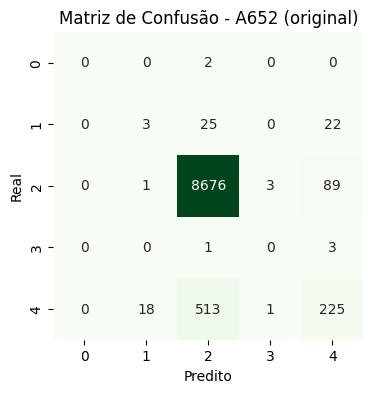

           A652 (original)
Precision           0.9292
Recall              0.2693
F1_score            0.2917


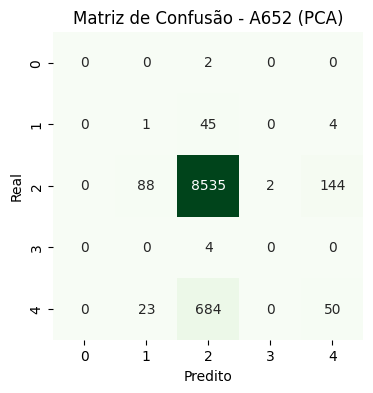

           A652 (PCA)
Precision      0.8961
Recall         0.2119
F1_score       0.2127


In [75]:
accuracy = executarGBC(C_X_train_A652, C_y_train_A652, C_X_test_A652, C_y_test_A652, "A652 (original)")

accuracy = executarGBC(C_X_train_A652_redux, C_y_train_A652, C_X_test_A652_redux, C_y_test_A652, "A652 (PCA)")


# Ajuste um modelo de árvore de decisão
#clf = GradientBoostingClassifier()
#clf.fit(C_X_train_A652_redux, C_y_train_A652)

# Faça previsões nos dados de teste
#y_pred = clf.predict(C_X_test_A652)

# Avalie o desempenho
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Acurácia do modelo: {accuracy:.2f}")

Analisando o resultado, podemos verificar que os níveis de precisão não tiveram grandes variações. Com isso, podemos afirmar que o uso do PCA foi positivo, pois mesmo com a redução de dimensionalidade, a precisão não foi impactada. Ao passo quem com esta redução permite a utilização de um conjunto de dados mais enxuto, proporcinando um processamento mais ágil.

# 5

Para este exercício farei uso do dataset já carregado do exercício 4.  

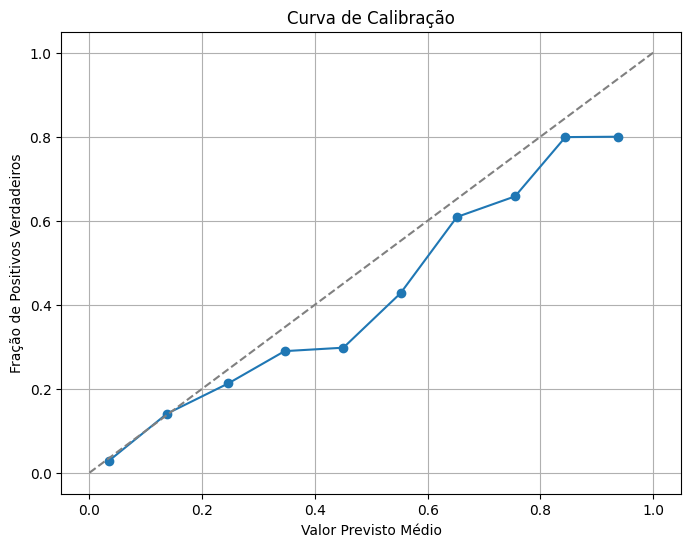

In [29]:
from sklearn.calibration import calibration_curve

# Associar os dataset do arquivo A652 para os conjuntos de treinamento e teste
X_Train = C_X_train_A652
y_Train = C_y_train_A652
X_test = C_X_test_A652
y_test = C_y_test_A652

# Aplicar o treinamento no algoritmo Gradient Boosting Classifier
modelGB = GradientBoostingClassifier(random_state=1)   
modelGB.fit(X_train, y_train)

# Fazer a predição de Gradient Boosting Classifier
y_predict_GB = modelGB.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_GB)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_GB)
    
# Obter as probabilidades previstas
prob_pos = modelGB.predict_proba(X_test)[:, 1]

# Calcular a curva de calibração
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Gráfico de calibração
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha de referência perfeita
plt.xlabel('Valor Previsto Médio')
plt.ylabel('Fração de Positivos Verdadeiros')
plt.title('Curva de Calibração')
plt.grid(True)
plt.show()


Para melhor o resultado, será utilizado o Scaler e alterações nos hiperparâmentros do algoritmo GradientBoostingClassifier

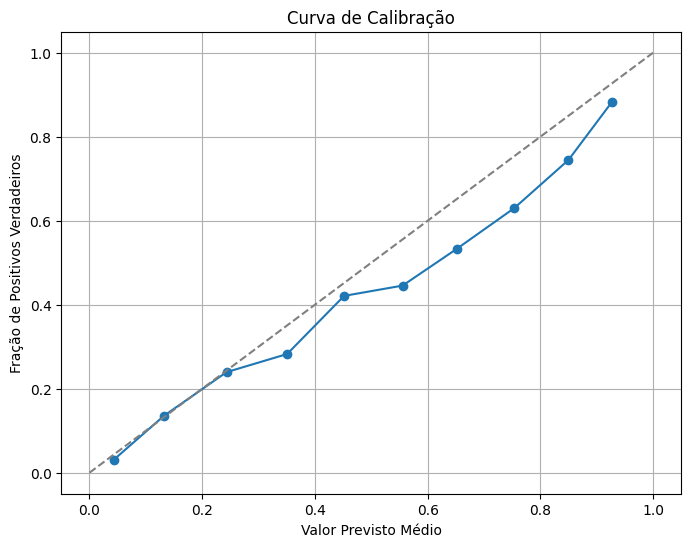

In [30]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing MixMax
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.transform(X_test)

# Aplicar o treinamento no algoritmo Gradient Boosting Classifier
modelGB = GradientBoostingClassifier(learning_rate=0.6, n_estimators=50, max_depth=1)   
modelGB.fit(X_train, y_train)

# Fazer a predição de Gradient Boosting Classifier
y_predict_GB = modelGB.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_GB)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_GB)
    
# Obter as probabilidades previstas
prob_pos = modelGB.predict_proba(X_test)[:, 1]

# Calcular a curva de calibração
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Gráfico de calibração
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha de referência perfeita
plt.xlabel('Valor Previsto Médio')
plt.ylabel('Fração de Positivos Verdadeiros')
plt.title('Curva de Calibração')
plt.grid(True)
plt.show()


Com as alterações a curva de calibração teve melhor aderência ao modelo

# 6

Para este exercício faremos a importação das bibliotecas novamente e o carregamento do arquivo de diamantes e seu devido tratamento para dados não numéricos

In [50]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Carregar o dataset a partir do arquivo texto
dataset = pd.read_csv('../data/diamonds.csv', header=0)

# Determina um vetor com valores crescentes dos atributos cut, color e clarity
order_cut = ['Fair','Good', 'Very Good', 'Premium', 'Ideal']
order_color = ['J','I','H','G','F','E','D']
order_clarity = ['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL']

# Adiciona campo cut com numeraçao crescente
order_encoder_cut=OrdinalEncoder(categories=[order_cut])
cut_encoded = order_encoder_cut.fit_transform(dataset[['cut']])
dataset['cut_encoded'] = cut_encoded

# Adiciona campo color com numeraçao crescente
order_encoder_color=OrdinalEncoder(categories=[order_color])
color_encoded = order_encoder_color.fit_transform(dataset[['color']])
dataset['color_encoded'] = color_encoded

# Adiciona campo clarity com numeraçao crescente
order_encoder_clarity=OrdinalEncoder(categories=[order_clarity])
clarity_encoded = order_encoder_clarity.fit_transform(dataset[['clarity']])
dataset['clarity_encoded'] = clarity_encoded

# Remover as colunas de objetos que foram transformados
dataset = dataset.drop('cut', axis=1)
dataset = dataset.drop('color', axis=1)
dataset = dataset.drop('clarity', axis=1)

# Remove o campo identidade do ínico
dataset = dataset.drop(dataset.columns[0], axis=1) 
dataset.head()
dataset.drop(dataset.columns[0], axis=1)

# Remover os registros onde a dimensão do diamante é zero
dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)


# Reduz dataset para processar rotina mais rápido (em teste)
#dataset = dataset.iloc[0:30]
 

dataset.shape

(53920, 9)

In [51]:
# Como outer_cv foi definida a quantidade de 3 folds
outer_cv = KFold(3)

# Duas interações internas
inner_cv = KFold(3)

# Define as features e o target do modelo (campo price) para predizer o valor
X= dataset.drop(["price"],axis =1)
y= dataset["price"] 

# give shorthand names to models and use those as dictionary keys mapping
# to models and parameter grids for that model
models_and_parameters = {
    'knr': (KNeighborsRegressor(),
            {'n_neighbors': [5, 10, 15]}),
    'lgr': (LogisticRegression(),
           {'C': [0.01, 0.1, 0.15]})}

# we will collect the average of the scores on the 3 outer folds in this dictionary
# with keys given by the names of the models in `models_and_parameters`
average_scores_across_outer_folds_for_each_model = dict()

# find the model with the best generalization error
for name, (model, params) in models_and_parameters.items():
    # this object is a regressor that also happens to choose
    # its hyperparameters automatically using `inner_cv`
    regressor_that_optimizes_its_hyperparams = GridSearchCV(
        estimator=model, param_grid=params,
        cv=inner_cv, scoring='neg_mean_squared_error')

    scores_across_outer_folds = cross_val_score(
        regressor_that_optimizes_its_hyperparams,
        X, y, cv=outer_cv, scoring='neg_mean_squared_error', error_score='raise')
    
    # get the mean MSE across each of outer_cv's 3 folds
    average_scores_across_outer_folds_for_each_model[name] = np.mean(scores_across_outer_folds)
    error_summary = 'Model: {name}\nMSE in the 3 outer folds: {scores}.\nAverage error: {avg}'
    print(error_summary.format(
        name=name, scores=scores_across_outer_folds,
        avg=np.mean(scores_across_outer_folds)))
    print()


print('Average score across the outer folds: ',
      average_scores_across_outer_folds_for_each_model)

many_stars = '\n' + '*' * 100 + '\n'
print(many_stars + 'Now we choose the best model and refit on the whole dataset' + many_stars)

best_model_name, best_model_avg_score = max(
    average_scores_across_outer_folds_for_each_model.items(),
    key=(lambda name_averagescore: name_averagescore[1]))

# get the best model and its associated parameter grid
best_model, best_model_params = models_and_parameters[best_model_name]

# now we refit this best model on the whole dataset so that we can start
# making predictions on other data, and now we have a reliable estimate of
# this model's generalization error and we are confident this is the best model
# among the ones we have tried
final_regressor = GridSearchCV(best_model, best_model_params, cv=inner_cv)
final_regressor.fit(X, y)

print('Best model: \n\t{}'.format(best_model), end='\n\n')
print('Estimation of its generalization error (negative mean squared error):\n\t{}'.format(
    best_model_avg_score), end='\n\n')
print('Best parameter choice for this model: \n\t{params}'
      '\n(according to cross-validation `{cv}` on the whole dataset).'.format(
      params=final_regressor.best_params_, cv=inner_cv))

Model: knr
MSE in the 3 outer folds: [ -3454923.17479248 -19600507.25286943   -725970.3011278 ].
Average error: -7927133.576263235

Model: lgr
MSE in the 3 outer folds: [ -7944170.65917436 -31187855.69548767  -1047903.43392867].
Average error: -13393309.929530235

Average score across the outer folds:  {'knr': -7927133.576263235, 'lgr': -13393309.929530235}

****************************************************************************************************
Now we choose the best model and refit on the whole dataset
****************************************************************************************************

Best model: 
	KNeighborsRegressor()

Estimation of its generalization error (negative mean squared error):
	-7927133.576263235

Best parameter choice for this model: 
	{'n_neighbors': 15}
(according to cross-validation `KFold(n_splits=3, random_state=None, shuffle=False)` on the whole dataset).
